In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mm_env import SimpleEnv
import pandas as pd
from utils import evaluate
from dataclasses import dataclass

In [2]:
%run './all_agents.ipynb' # import all agents

In [3]:
env = SimpleEnv(debug=False, T=100, lambda_neg=15, lambda_pos=10, kappa=10, Q=4)

### Random

In [4]:
agent_random = RandomAgent(env_d=env.d)

In [5]:
logs_random, stats_random = evaluate(agent_random, env, num_episodes=100)

### Q Learning

In [27]:
learning_rate = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
num_episodes = 5000
num_steps = 100

In [28]:
agent_q = QAgent(env_d=env.d, env_Q=env.Q, env_T=env.T, 
                 epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.3)

In [29]:
q_table = {(i, j): np.zeros((env.d, env.d)) for i in range(-env.Q, env.Q + 1) for j in range(env.T + 1)}

def choose_action(state, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.array(np.unravel_index(np.argmax(q_table[state]), q_table[state].shape))

for episode in range(num_episodes):
    env.reset()
    state = env.state()
    done = False
    total_reward = 0

    for step in range(num_steps):
        action = choose_action(state, epsilon)
        next_state, reward, done = env.step(action)

        # Update Q-table
        #q_table[state][action] = (1 - learning_rate) * q_table[state][action] + learning_rate * (reward + gamma * (np.max(q_table[next_state])) - q_table[state][action]))
        q_table[state][action] += learning_rate * ((reward + gamma * (np.max(q_table[next_state]))) - q_table[state][action])

        state = next_state
        total_reward += reward

        if done:
            break

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon - epsilon_decay)

    # Print episode results
    if (episode + 1) % 1000 == 0:
        print(f'Episode: {episode + 1}, Total Reward: {total_reward}')

Episode: 1000, Total Reward: 80.30855851822564
Episode: 2000, Total Reward: 51.09829704060059
Episode: 3000, Total Reward: 84.34574283418112
Episode: 4000, Total Reward: 32.26380359173964
Episode: 5000, Total Reward: 20.076844623416644


In [31]:
logs_q, stats_q = evaluate(agent_q, env, num_episodes=100, q_table=q_table)

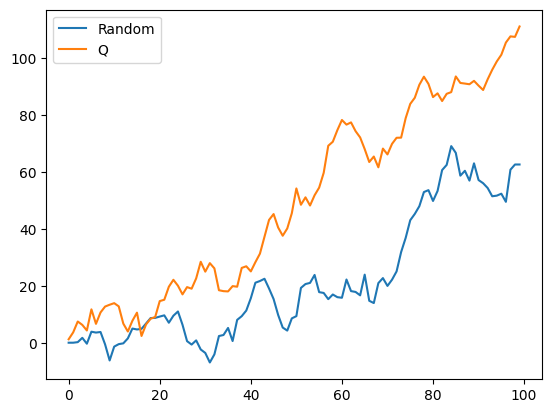

In [32]:
#plot rewards
plt.plot(logs_random['rewards'], label='Random')
plt.plot(logs_q['rewards'], label='Q')
plt.legend()
plt.show()

In [33]:
#print stats_q and stats_random in a table without considering the last two keys of stats_q
df = pd.DataFrame([stats_q, stats_random]).T
df.columns = ['QAgent', 'RandomAgent']
df

,QAgent,RandomAgent
mean_reward,36.513812,36.925902
min_reward,-69.378691,-54.155316
max_reward,124.073491,118.439673
std_reward,39.980328,31.276910
